In [2]:
from __future__ import division
from numpy import *
%matplotlib notebook
from matplotlib.pyplot import *
from IPython.display import *

from audio.index import *
import nltk; nltk.download("timit")
import audio.wave as wave
from audio.filters import *
from audio.fourier import F

[nltk_data] Downloading package timit to /home/boisgera/nltk_data...
[nltk_data]   Package timit is already up-to-date!


In [3]:
df = 16000
dt = 1.0 / df
T = 3.0
t = r_[0.0:T:dt]
f0 = 2000.0
f1 = 6000.0
x = 0.5*(sin(2*pi*f0*t) + sin(2*pi*f1*t))
display(len(x) / 16000.0)
wave.write(x, "x.wav", df=df)
#y = wave.read("x.wav")[0]
Audio("x.wav")

3.0

In [4]:
display(search(type=Utterance)[0])
x = search(type=Utterance)[0].audio[:-1]
x = x / amax(abs(x))
wave.write(x, "x.wav", df=df)
y = wave.read("x.wav")[0]
Audio("x.wav")

a crab challenged me but a quick stab vanquished him

<IPython.core.display.Javascript object>


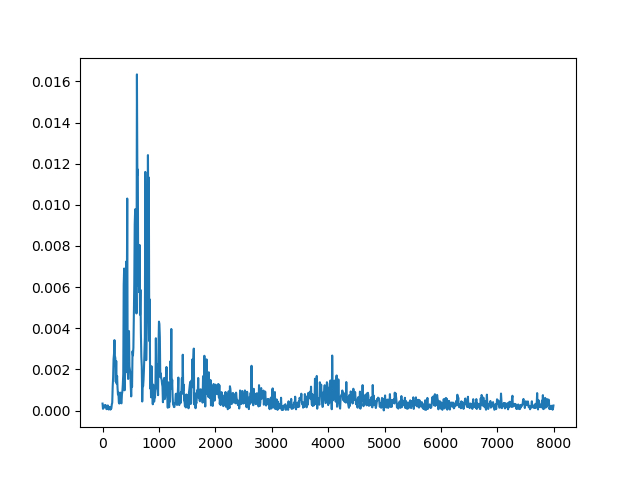

In [5]:
Fx = F(x, dt=dt, power_of_two=True)
f = r_[0.0:df/2.0:df/2.0/2**10]
figure()
plot(f, abs(Fx(f)))
#plot(f)

In [6]:
x2 = x[::2]
wave.write(x2, "x2.wav", df=df/2)
Audio("x2.wav")

<IPython.core.display.Javascript object>


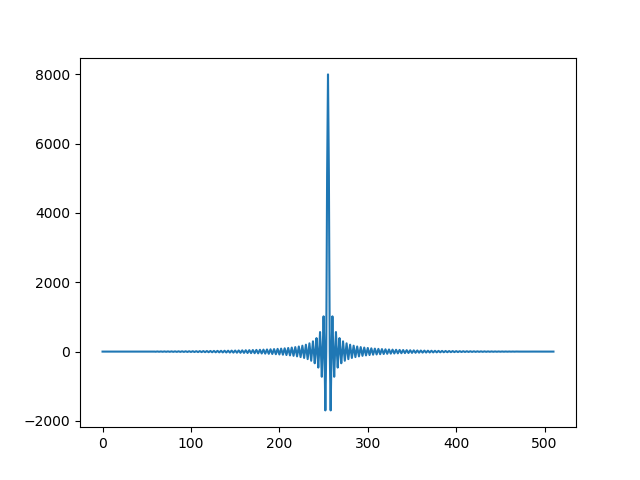

In [7]:
fc = 4000.0
h = low_pass(fc, dt=dt, window=hanning)
n = 511
hn = h(n)
figure()
plot(hn)

<IPython.core.display.Javascript object>


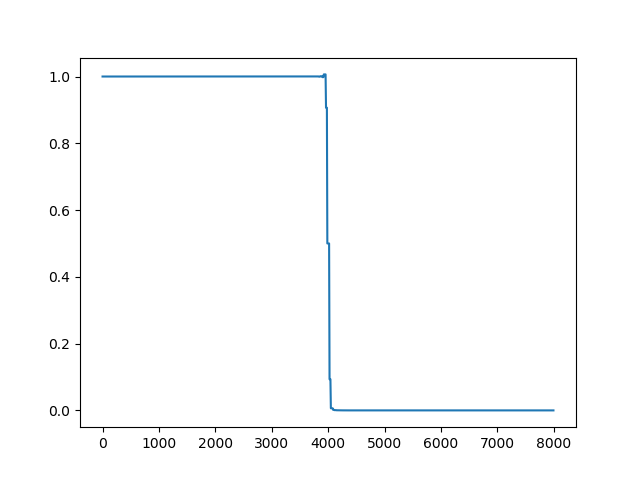

In [8]:
Fhn = F(hn, dt=dt, power_of_two=True)
f = r_[0.0:df/2.0:df/2.0/2**10]
figure()
plot(f, abs(Fhn(f)))

<IPython.core.display.Javascript object>


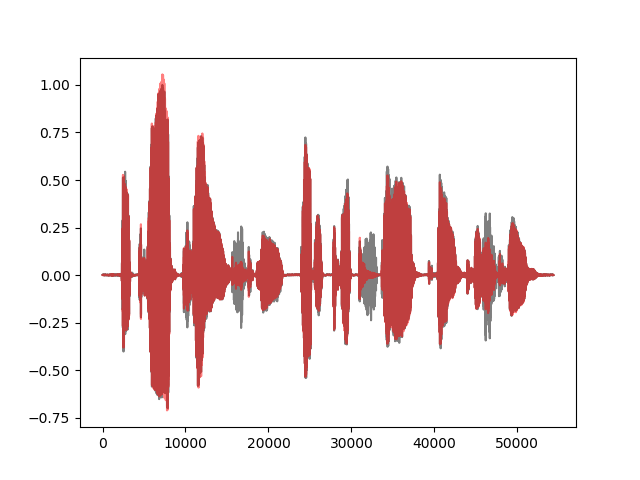

In [9]:
x3 = dt * convolve(x, hn)
len(x), len(x3)
x3 = x3[n//2:-(n//2)]
figure()
plot(x, "k", alpha=0.5)
plot(x3, "r", alpha=0.5)
display(Audio("x.wav"))
wave.write(x3, "x3.wav", df=df)
display(Audio("x3.wav"))

In [10]:
x4 = x3[::2]
wave.write(x4, "x4.wav", df=df/2)
display(Audio("x3.wav"))
display(Audio("x4.wav"))

54374

54374

<IPython.core.display.Javascript object>


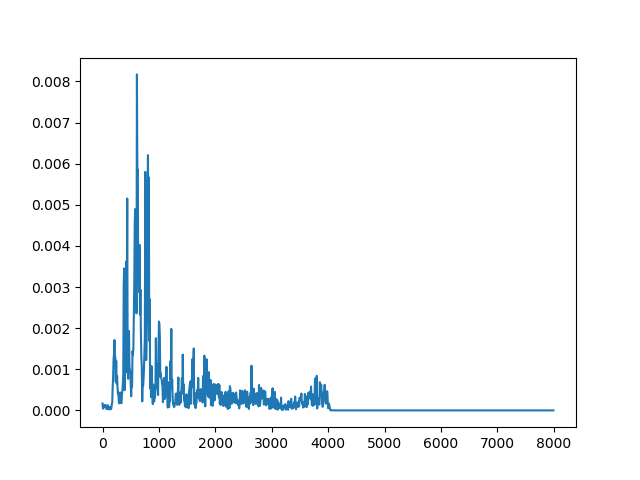

(255, 511)

In [11]:
x5 = zeros(len(x3))
x5[::2] = x4
display(len(x5))
x5 = (dt * convolve(x5, hn))[n//2:-(n//2)]
display(len(x5))
Fx = F(x5, dt=dt, power_of_two=True)
f = r_[0.0:df/2.0:df/2.0/2**10]
figure()
plot(f, abs(Fx(f)))
wave.write(x5, "x5.wav", df=df)
Audio("x5.wav")
n//2, len(hn)

<IPython.core.display.Javascript object>


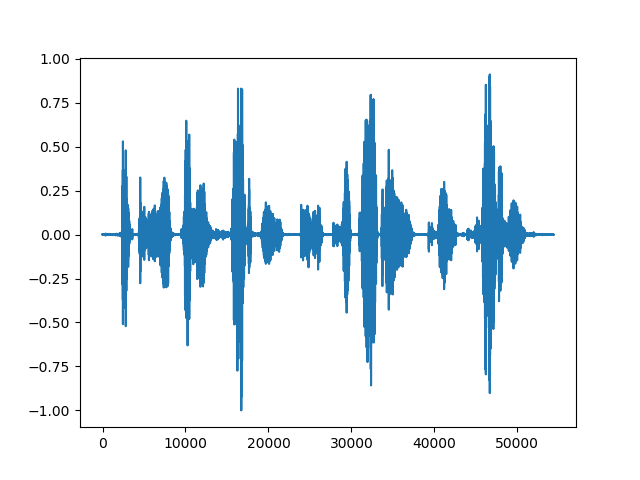

In [12]:
e = x - 2*x5
e = e / amax(abs(e))
wave.write(e, "e.wav", df=df)
Audio("e.wav")
figure()
plot(e)